In [1]:
#data importing
adv <- read.csv('./data/Advertising.csv', row.names=1)

In [2]:
head(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


## Exercise1 :Calculate B0, B1 for Sales ~ f(TV)

In [3]:
#y=sales and x=tv
x_mean <- mean(adv$TV)
y_mean <- mean(adv$sales)

#Apply formula for B1 (page 62 of the book)
#create new variables to later add
adv$x_minus_mean <- adv$TV - x_mean
adv$y_minus_mean <- adv$sales - y_mean
adv$x_minus_mean2 <- (adv$TV -x_mean)^2

#B1
B1 <- sum(adv$x_minus_mean*adv$y_minus_mean)/sum(adv$x_minus_mean2)

print(paste("B1",B1))
      
#Now B0 using B1
B0 <- y_mean - (B1*x_mean)
      
print(paste("B0",B0))

[1] "B1 0.0475366404330197"
[1] "B0 7.03259354912769"


In [4]:
#Compare using the lm formula seen in class
md <- lm(sales ~ TV, data=adv)
summary(md)


Call:
lm(formula = sales ~ TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


## Exercise2:Calculate B0, B1 for Sales ~ f(Radio)

In [5]:
#mean_radio
mean_radio <- mean(adv$radio)

#Apply formula for B1 (page 62 of the book)
#create new variables to later add
adv$x_minus_meanrad <- adv$radio - mean_radio
adv$x_minus_meanrad2 <- (adv$radio -mean_radio)**2

#B1
B1_rad <- sum(adv$x_minus_meanrad*adv$y_minus_mean)/sum(adv$x_minus_meanrad2)
print(paste("B1 radio",B1_rad))
#Now B0 using B1
B0_rad <- y_mean - (B1_rad*mean_radio)
print(paste("B0 radio",B0_rad))

[1] "B1 radio 0.20249578339244"
[1] "B0 radio 9.31163809515828"


In [6]:
#confirm using formula from class
summary(lm(sales ~ radio, data=adv))


Call:
lm(formula = sales ~ radio, data = adv)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


## Exercise 3:Calculate the 95% confidence interval of B0, B1 for model Sales ~ f(TV)?

In [7]:
#RSS_tv 
adv$rsstv <- mapply(function(x,y)(y-B0-B1*x)**2,adv$radio,adv$sales)
RSS_tv <- sum(adv$rsstv)
RSE_tv <- (RSS_tv/(nrow(adv)-2))**0.5                    
#SE_B1
adv$dif2 <- (adv$TV-mean(adv$TV))**2                
SE_B1 <- (RSE_tv/sum(adv$dif2))**0.5
#SE_B0
SE_B0 <- (RSE_tv/nrow(adv) + (mean(adv$TV)/adv$dif2))**0.5             
#upper and lower bounds 
B1_low <- B1 - (2*SE_B1)
B1_high <- B1 + (2*SE_B1)
B0_low <- B0 -(2*SE_B0)
B0_high <- B0 + (2*SE_B0)

print(paste("B1:",B1_low,B1_high))
print(paste("B0:",B0_low,B0_high))

[1] "B1: 0.0429683522620475 0.0521049286039919"
  [1] "B0: 6.54441624331541 7.52077085493998" 
  [2] "B0: 6.57543538565657 7.48975171259882" 
  [3] "B0: 6.59906782050961 7.46611927774578" 
  [4] "B0: 1.57777947909994 12.4874076191554" 
  [5] "B0: 6.21455263691055 7.85063446134484" 
  [6] "B0: 6.60388715536796 7.46129994288743" 
  [7] "B0: 6.55676311628349 7.5084239819719"  
  [8] "B0: 6.04802737421275 8.01715972404264" 
  [9] "B0: 6.60393891981488 7.46124817844051" 
 [10] "B0: 6.42895945170609 7.6362276465493"  
 [11] "B0: 6.53981477339483 7.52537232486056" 
 [12] "B0: 6.50198295505726 7.56320414319813" 
 [13] "B0: 6.59466517261335 7.47052192564204" 
 [14] "B0: 6.40594345507435 7.65924364318104" 
 [15] "B0: 6.45490547127078 7.61028162698461" 
 [16] "B0: 6.39652856985866 7.66865852839673" 
 [17] "B0: 6.53588025343672 7.52930684481867" 
 [18] "B0: 6.60173485689154 7.46345224136385" 
 [19] "B0: 6.53246996089961 7.53271713735578" 
 [20] "B0: -87.1515836311013 101.216770729357"
 [21] "B0: 6

In [8]:
# Double check with the lm function
md <- lm(sales ~ TV, data=adv)
summary(md)


Call:
lm(formula = sales ~ TV, data = adv)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


## Exercise 4 :Calculate the t-statistic and p-value for predictors radio and newspaper

In [9]:
#Calculate t for radio 
#rss radio
adv$rss_radio <- mapply(function(x,y) (y-B0_rad-B1_rad*x)**2,adv$radio,adv$sales)
RSS_rad <- sum(adv$rss_radio)
RSS_rad
#rse radio
RSE_rad <- (RSS_rad/(nrow(adv)-2))**0.5
RSE_rad
#SE(B1_rad)
SE2_rad <- RSE_rad/sum((adv$radio-mean(adv$radio))**2)
SE_B1rad <-(SE2_rad)**0.5
SE_B1rad

#T_statistic

t_stat <- (B1_rad-0)/SE_B1rad
print(paste("t value", t_stat))

[1] 3618.48

[1] 4.274944

[1] 0.00987201

[1] "t value 20.5121137421055"


In [10]:
#Calculate t for newspaper
adv$diff_news <- mapply(function(x)(x-mean(adv$newspaper)),adv$newspaper) 
adv$diff_news2 <-  mapply(function(x)(x-mean(adv$newspaper))**2,adv$newspaper)
B1_news <- sum(adv$diff_news*adv$y_minus_mean)/sum(adv$diff_news2)
B0_news <- mean(adv$sales)-B1_news*mean(adv$newspaper)
#rss newspaper
adv$rss_news <- mapply(function(x,y) (y-B0_news-B1_news*x)**2,adv$newspaper,adv$sales)
RSS_news <- sum(adv$rss_news)
RSS_rad
#rse newspaper
RSE_news <- (RSS_news/(nrow(adv)-2))**0.5
RSE_news
#SE(B1_rad)
SE2_news <- RSE_news/sum(adv$diff_news2)
SE_B1news <-(SE2_news)**0.5
SE_B1news

#T_statistic

t_stat_news <- (B1_news-0)/SE_B1news
print(paste("t value", t_stat_news))

[1] 3618.48

[1] 5.09248

[1] 0.00734527

[1] "t value 7.4460295988044"


## Exercise 5 

In [11]:
adv$num    <- mapply(function (x,y) (x - mean(adv$newspaper)) * (y - mean(adv$sales)), adv$newspaper, adv$sales)
adv$denom  <- mapply(function (x) (x - mean(adv$newspaper))**2, adv$newspaper)
B1         <- sum(adv$num) / sum(adv$denom)           
B0         <- mean(adv$sales) - B1*mean(adv$newspaper)

adv$rss    <- mapply(function(x,y) (y - B0 - B1*x)**2, adv$newspaper, adv$sales) 
RSS        <- sum(adv$rss)
RSE        <- (RSS/(nrow(adv)-2))**0.5

adv$y2     <- mapply(function (x) (x - mean(adv$sales))**2, adv$sales)
Correlation <- sum(adv$num) / ((sum(adv$denom)**0.5) * (sum(adv$y2)**0.5))
R2         <- Correlation**2
                     
print(paste("RSE:", RSE, " R2", R2))                          

[1] "RSE: 5.09248036652019  R2 0.0521204454443051"


## Exercise 6 : Use the matrix formula to estimate the parameters of multilinear regression model.

## Exercises from the book

Page 52 exercise 2

a) Regression Model n=500 (sample size) and P= 3 (profit,number of employees and Industry), Mostly interested in inference of the factors that affect the CEO salary.

b) Classification model with n=20(number of products) P=13 (different variables including price budget and competition price). Here we are mostly interest in prediction if it is either a success or a failure.

c) Regression Model 
n=52 (amount of weeks in a year)
p= 4  (%change in the USD/Euro, %change in the US market, % change in the British Market and %Change in the German Market)
Predicition is of most interest.

In [18]:
#Exercise 10 page 56 
#a)
library(MASS)
head(Boston)
row_number <- nrow(Boston)
col_number <- ncol(Boston)

print(paste("row number",row_number))
print(paste("column number",col_number))

print("The columns represent the variables that influence the crime rate in Boston and the rows is the observed amount for
a certain period")

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] "row number 506"
[1] "column number 14"
[1] "The columns represent the variables that influence the crime rate in Boston and the rows is the observed amount for\na certain period"


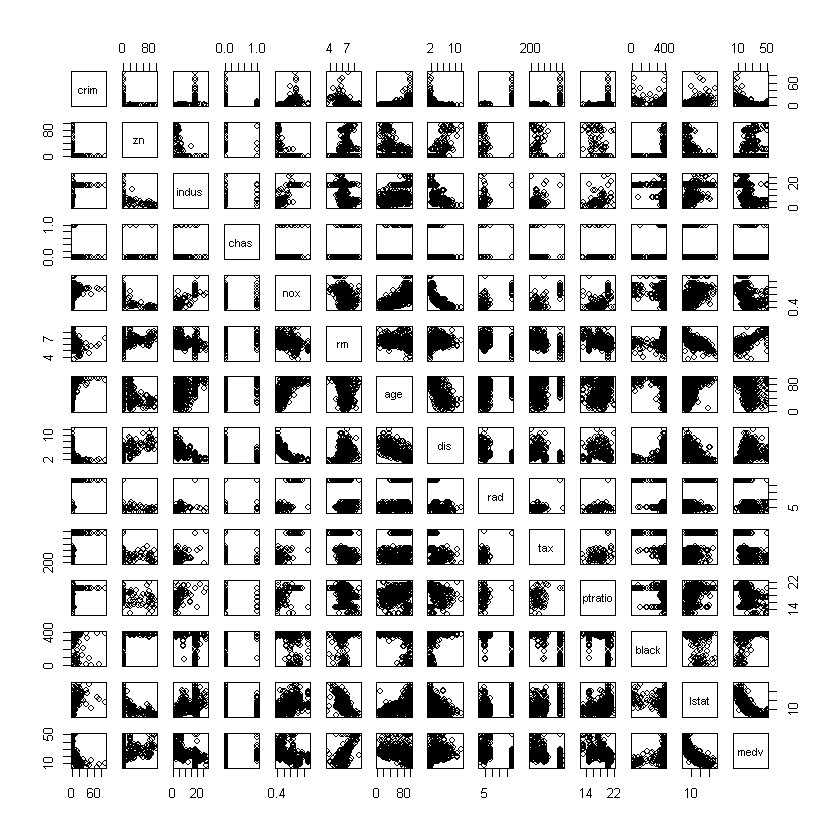

In [21]:
#b)
pairs(Boston)
#The less age the more crime rate 
#The black population lives further away from employment centres 
#The lowest status of the poulation lives in the more industrialized areas 

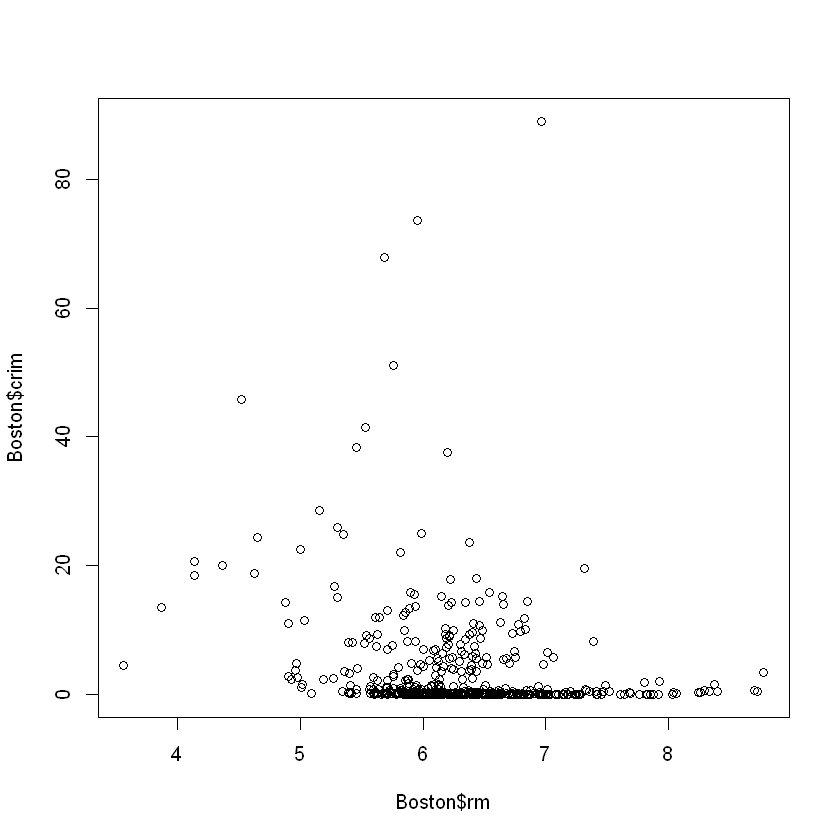

In [24]:
#c)
plot(Boston$rm,Boston$crim)
#When there is more availability of rooms per dwelling the crime rate tends to be much lower than when there is less rooms.
#This may be due to the fact that less rooms per dwelling is related to the income of the people living there. 

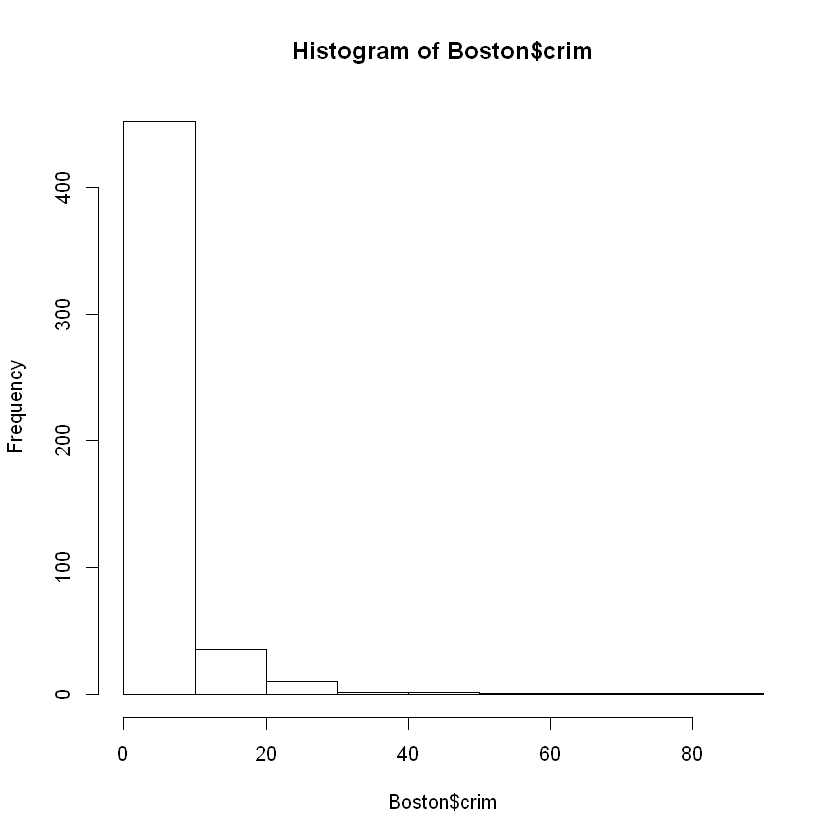

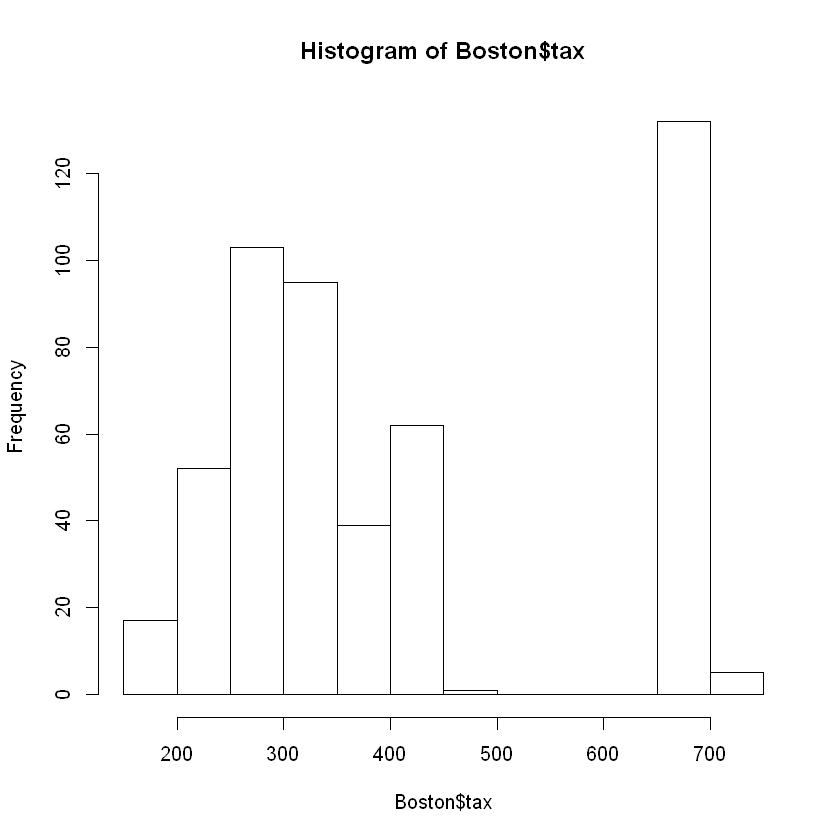

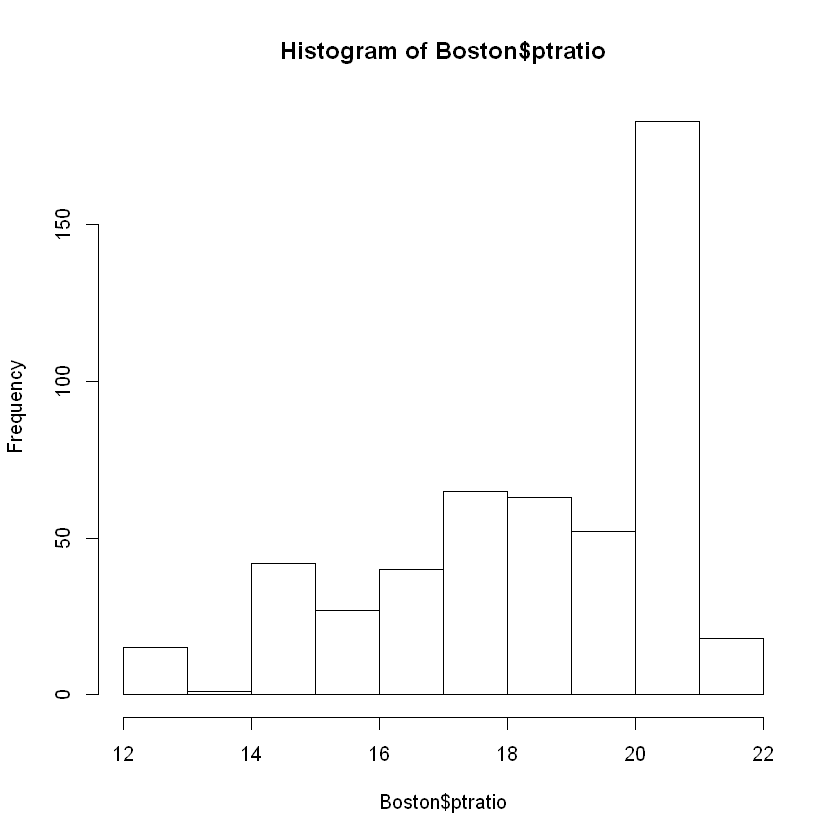

In [25]:
#d)
hist(Boston$crim)
hist(Boston$tax)
hist(Boston$ptratio)
#There is a significant difference in this predictors per suburbs observed. 

In [27]:
#e)
sum(Boston$chas)
#35 suburbs bound the charles river 

[1] 35

In [28]:
#f)
median(Boston$ptratio)

[1] 19.05

In [32]:
#g)
Boston[Boston$medv==min(Boston$medv),]
#399 and 406 have the lowest median value of owner occupied homes
#Their crime rate is very high 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.3518,0,18.1,0,0.693,5.453,100,1.4896,24,666,20.2,396.90,30.59,5
406,67.9208,0,18.1,0,0.693,5.683,100,1.4254,24,666,20.2,384.97,22.98,5


In [35]:
#h)
nrow(Boston[Boston$rm > 7,])
nrow(Boston[Boston$rm > 8,])

#64 with more than 7 rooms per dwelling and 13 with more than 8 

[1] 64

[1] 13

In [36]:
#Chapter 3 exercise 3
B0 <- 50
B1 <- 20
B2 <- 0.07
B3 <- 35
B4 <- 0.01
B5 <- -10

iq <- 110
gpa <- 4
iq <- 110
gpa <- 4

gender_f <- 1
salary <- B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
print(paste("salary females",salary))

gender_f <- 0
salary <- B0 + B1*gpa + B2*iq + B3*gender_f + B4*(gpa*iq) + B5*(gpa*gender_f)
print(paste("salary males",salary))


[1] "salary females 137.1"
[1] "M 142.1"


In [38]:
#Chapter 3 exercise 10
library(ISLR)
head(Carseats)
#a)
lm.fit <- lm(Sales ~ Price + Urban + US, data = Carseats)
summary(lm.fit)
 

#c)
sales <- Price <- UrbanYes <- USYes <- 0
lm.fit$coeff
sales <- B0 + B1 * Price + B2 * UrbanYes + B3 * USYes


#e)
lm.fit1 <- lm(Sales ~ Price + US, data = Carseats)
summary(lm.fit1)

#g)
confint(lm.fit1, level = 0.95)

#h)
summary(Carseats[,c("Sales", "Price", "US")])


Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


(Intercept)       Price    UrbanYes       USYes 
13.04346894 -0.05445885 -0.02191615  1.20057270


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


     Sales            Price         US     
 Min.   : 0.000   Min.   : 24.0   No :142  
 1st Qu.: 5.390   1st Qu.:100.0   Yes:258  
 Median : 7.490   Median :117.0            
 Mean   : 7.496   Mean   :115.8            
 3rd Qu.: 9.320   3rd Qu.:131.0            
 Max.   :16.270   Max.   :191.0            

In [42]:
#Chapter 3 exercise 15
#a)
estim <- NULL
for(pred in names(Boston)){
    lm.fit <- lm(Boston$crim ~ Boston[,pred])
    t_stat <- summary(lm.fit)$predictors[2,]
    estim <- cbind(estim, t)
    colnames(estim)[ncol(estim)] <- pred
}
estim

estim[, estim[4,] < 0.05]

Warning message in summary.lm(lm.fit):
"essentially perfect fit: summary may be unreliable"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Estimate,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01
Std. Error,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02
t value,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00
Pr(>|t|),1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Estimate,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01,-3.631599e-01
Std. Error,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02,3.839017e-02
t value,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00,-9.459710e+00
Pr(>|t|),1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19,1.173987e-19


In [43]:
#b)
multiple <- lm(crim~.,data=Boston)
summary(multiple)
#So zn, dis, rad ,black and medv are not significant the rest can reject the null hypothesis.


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

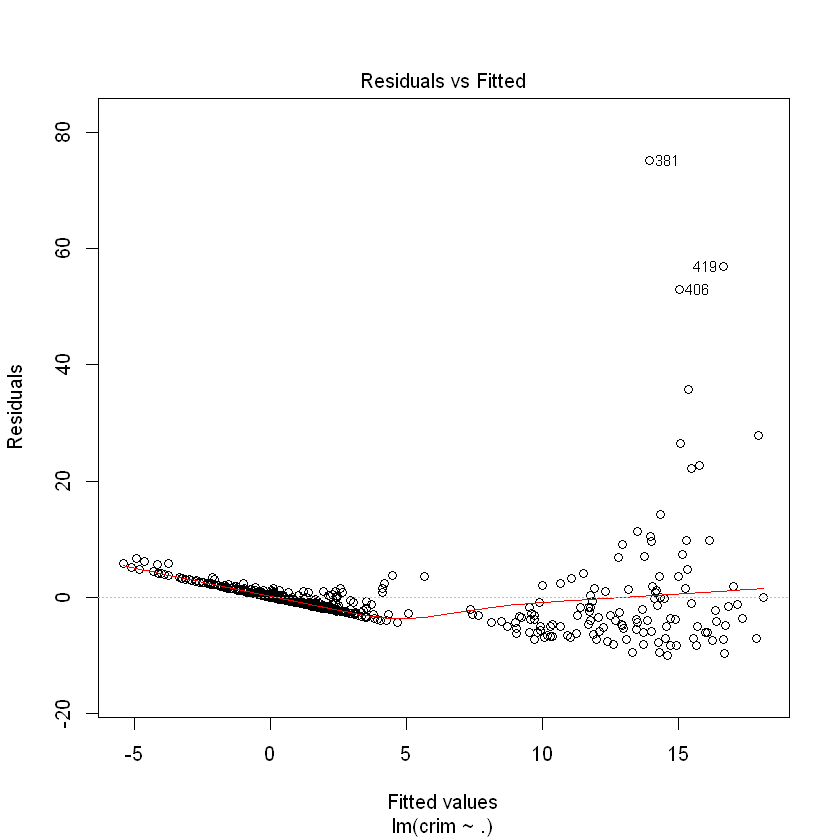

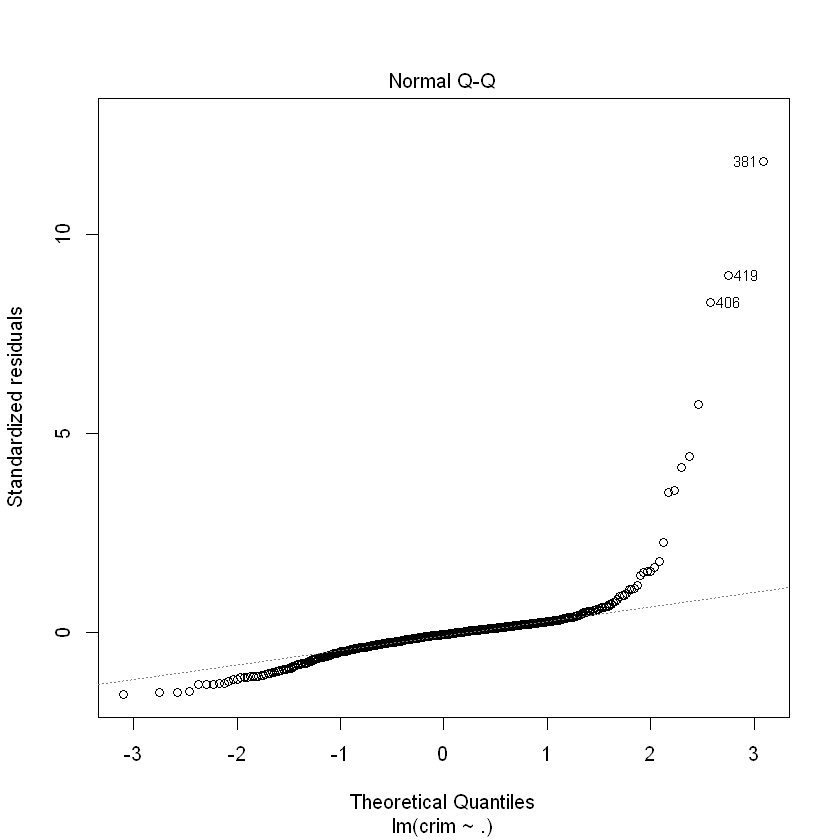

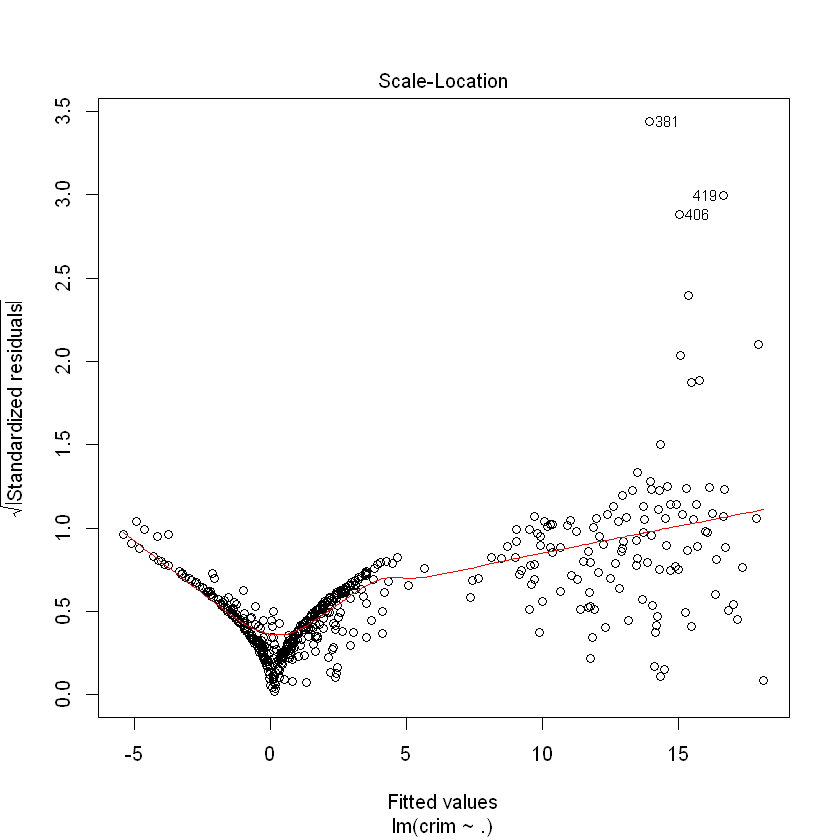

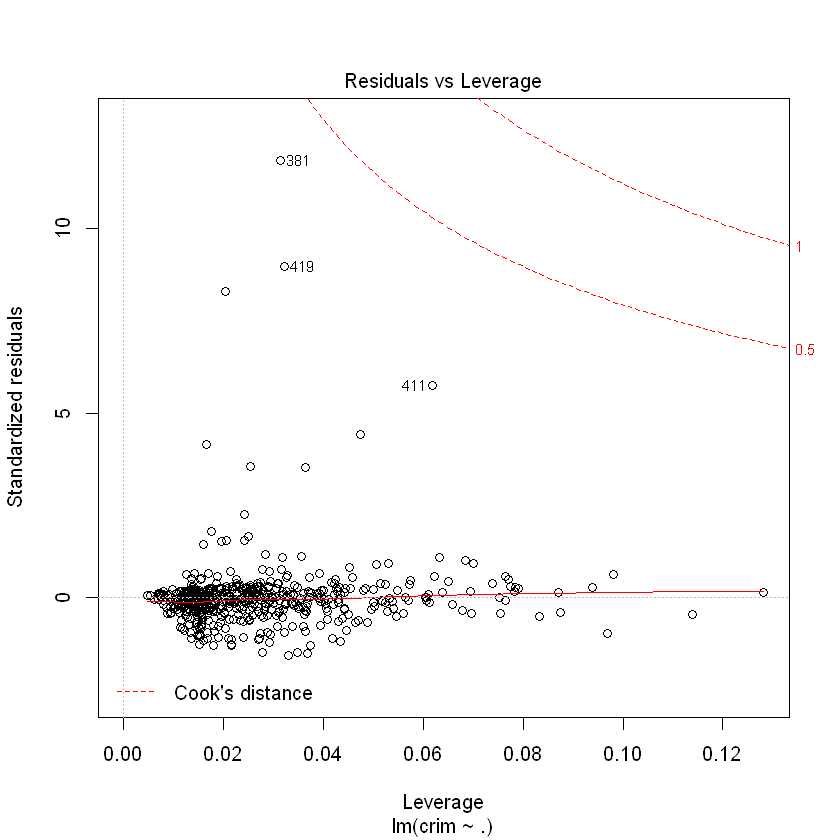

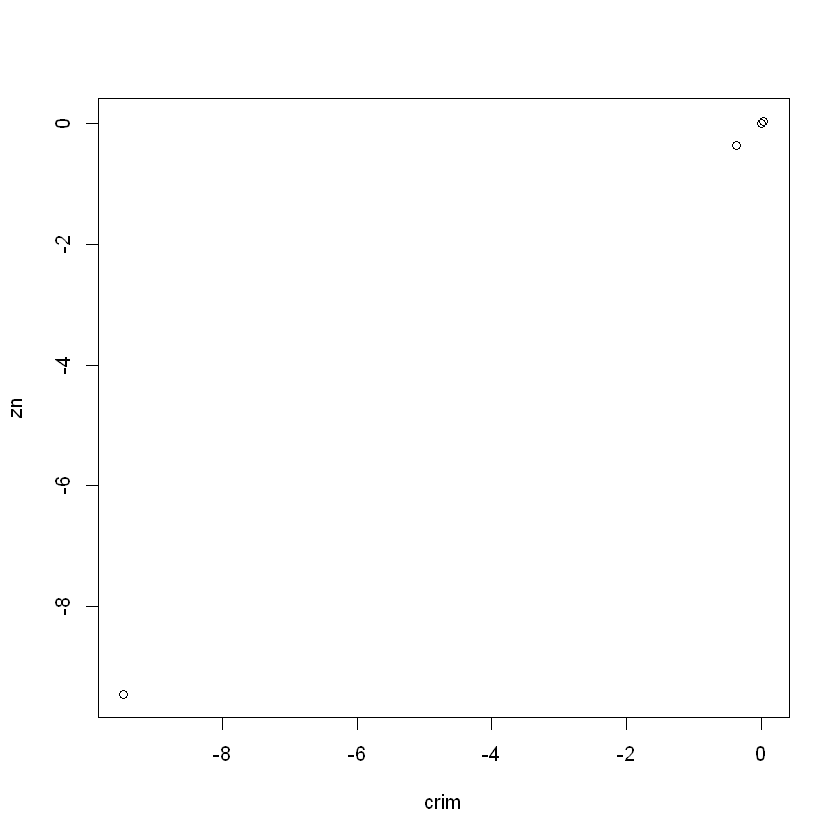

In [45]:
#c)

plot(multiple)
plot (estim)

In [51]:
    lm.fit2 = lm(crim ~ lstat + I(lstat^2)+ I(lstat^3),data=Boston)
lm.fit2


Call:
lm(formula = crim ~ lstat + I(lstat^2) + I(lstat^3), data = Boston)

Coefficients:
(Intercept)        lstat   I(lstat^2)   I(lstat^3)  
  1.2009656   -0.4490656    0.0557794   -0.0008574  


In [55]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [57]:
#d 

x = c(1:length(Boston))
colnames(Boston)

for (i in colnames(Boston)){
    x = lm(Boston$crim ~ Boston[i] + I(Boston[i]^2)+ I(Boston[i]^3))

}
x

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

ERROR: Error in model.frame.default(formula = Boston$crim ~ Boston[i] + I(Boston[i]^2) + : invalid type (list) for variable 'Boston[i]'


In [65]:
a <- NULL
for (i in colnames(Boston)){
    d <- lm(Boston$crim ~ Boston$i)
    t <- summary(d)$i[2,]
    a <- cbind(d, t)
}
a

d                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [62]:
x


Call:
c("(Intercept)" = -2.06374260632782, "Boston$i" = 0.509776331104231
)

Coefficients:
(Intercept)     Boston$i  
    -2.0637       0.5098  
